In [32]:
%reload_ext autoreload
%autoreload 2

In [1]:
import tensorflow as tf
import keras 
tf.__version__
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [4]:
import model as M
import numpy as np
import helpers as H
import os

SyntaxError: invalid syntax (helpers.py, line 369)

In [5]:
model = M.compile_model()
model.load_weights('pascal_yolov3.h5')
# wd = M.WeightDecoder('yolov3.weights')
# wd.load_weights(model)

W0814 16:15:49.662218 4548974016 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv_0 (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
bnorm_0 (BatchNormalization)    (None, None, None, 3 128         conv_0[0][0]                     
__________________________________________________________________________________________________
leaky_0 (LeakyReLU)             (None, None, None, 3 0           bnorm_0[0][0]                    
______________________________________________________________________________________________

In [6]:
from tensorflow.python.keras.layers import Conv2D

for i, layer in enumerate(model.layers):
    
    layer.trainable = False

    try:
        digits = int(layer.name[-2:])
        if digits in range(52,59) or digits in range(60,67) or digits in range(68,75): 
            layer.trainable = True
    except: 
        pass


In [7]:
losses = [H.loss(64, 13, 0.5, 0.5, 0.5),
         H.loss(64, 26, 0.5, 0.5, 0.5),
         H.loss(64, 52, 0.5, 0.5, 0.5)]

model.compile(loss=losses, optimizer='adam')

W0814 16:16:27.062782 4548974016 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
classnames = {
                'person':0, 
                'bird': 1,
                'cat':2,
                'cow':3,
                'dog':4,
                'horse':5, 
                'sheep':6,
                'aeroplane':7,
                'bicycle':8,
                'boat':9,
                'bus':10,
                'car':11,
                'motorbike':12,
                'train':13,
                'bottle':14,
                'chair':15,
                'diningtable':16,
                'pottedplant':17,
                'sofa':18,
                'tvmonitor':19
            }
    
# with open('pascal.names', 'r') as f:
#     for i, line in enumerate(f):
#         classnames[line.strip()] = i
    
anchors_scale_1 = np.array([[32,38],[70,99],[100,114]])
anchors_scale_2 = np.array([[138,142],[175,185],[232,224]])
anchors_scale_3 = np.array([[253,272],[347,279],[371,355]])

anchors = [anchors_scale_3, anchors_scale_2, anchors_scale_1]
scales = [13,26,52]

In [7]:
files = os.listdir('VOCdevkit/VOC2012/JPEGImages')
n = len(files)

batch_size = 64
epochs = 20

steps_per_epoch = n // batch_size

233
218
149
372
best_scale  0
x =  225.00000006183495
y =  193.99999990642837
width =  148.99999677849152
height =  371.99999878672315


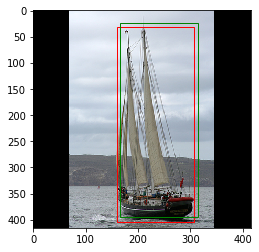

In [14]:
import random

file = random.choice(files)
    
filename, file_extension = os.path.splitext(file)
img, scaled_bboxes = H.get_img_bboxes(filename)
cell_data = H.get_full_ground_truth_data(scaled_bboxes, classnames, scales, anchors)
        
H.show(img, scaled_bboxes, cell_data, anchors)
    

In [1]:
loss = H.loss(1, 13, 5, 0.5, 0.5)

generator = H.image_data_generator(files, 1, classnames, scales, anchors)
y_true = next(generator)

y_pred = np.random.rand(1,13,13,75)

l = loss(y_true[1][0], y_pred)

import tensorflow as tf
with tf.Session() as sess:
    print (sess.run(l))


NameError: name 'H' is not defined

In [11]:
model.fit_generator(H.image_data_generator(files, batch_size, classnames, strides, anchors), steps_per_epoch=steps_per_epoch, epochs = epochs)

Epoch 1/20
  1/267 [..............................] - ETA: 9:21:34 - loss: 8217236.0000 - conv_58_loss: 400156.1875 - conv_66_loss: 1623871.1250 - conv_74_loss: 6193208.5000

KeyboardInterrupt: 

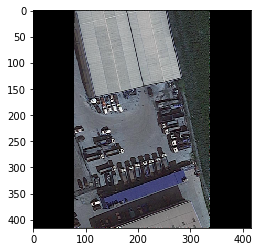

In [68]:
from PIL import Image
import matplotlib.pyplot as plot
import matplotlib.patches as patches
import numpy as np

from bs4 import BeautifulSoup as bs

im = Image.open('cars.png')
    
size = 416, 416    

scale = 416 / max(im.size)
    
im.thumbnail(size, Image.ANTIALIAS)
    
x_offset = (size[0] - im.size[0])//2
y_offset = (size[1] - im.size[1])//2
    
         
final = Image.new(mode='RGB',size=size,color=(0,0,0))
final.paste(im, (x_offset, y_offset))

fig,ax = plot.subplots(1)
ax.imshow(final)